In [12]:
import cudf as cf
import datetime as dt

# Read the CSV file
eurgbp = cf.read_csv('/home/edoardocame/Desktop/python_dir/data/eurgbp-m1-bid-2015-01-01-2025-01-30T14:40.csv', index_col=0)

# Convert the index to datetime
eurgbp.index = cf.to_datetime(eurgbp.index)

# Extract the hour from the datetime index
eurgbp['hour'] = eurgbp.index.hour

#Returns
eurgbp['returns'] = eurgbp['close'].pct_change()

# Display the first few rows
eurgbp.head()

,open,high,low,close,volume,hour,returns
timestamp,,,,,,,
2015-01-01 22:00:00,0.77640,0.77640,0.77633,0.77633,6.00,22,<NA>
2015-01-01 22:01:00,0.77636,0.77667,0.77636,0.77667,1.90,22,0.000437958
2015-01-01 22:02:00,0.77667,0.77667,0.77661,0.77661,0.30,22,-7.725288733e-05
2015-01-01 22:03:00,0.77655,0.77662,0.77650,0.77662,1.40,22,1.287647597e-05
2015-01-01 22:04:00,0.77644,0.77649,0.77644,0.77644,21.48,22,-0.000231774


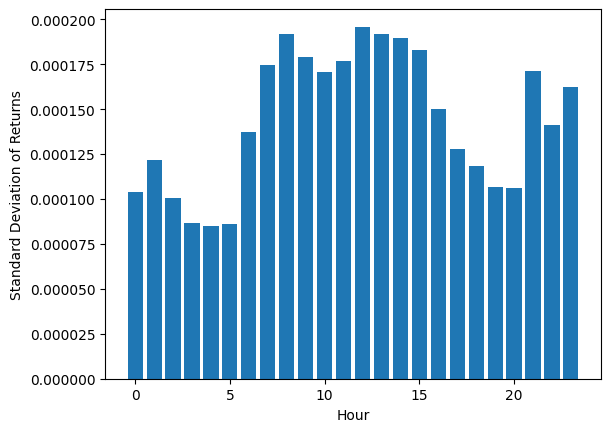

In [31]:
hourly_std = eurgbp.groupby('hour')['returns'].std()
import matplotlib.pyplot as plt

# Convert to NumPy array
hourly_std_index = hourly_std.index.to_numpy()
hourly_std_values = hourly_std.to_numpy()

plt.bar(hourly_std_index, hourly_std_values)
plt.xlabel('Hour')
plt.ylabel('Standard Deviation of Returns')
plt.show()